In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [11]:

data = pd.read_csv("/content/Churn_Modelling.csv")

In [12]:

df = data.drop(columns=["RowNumber", "CustomerId", "Surname"])
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [13]:

X = df.drop("Exited", axis=1)
y = df["Exited"]

In [14]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42, stratify=y )

In [16]:
models = { "Logistic Regression": LogisticRegression(max_iter=1000), "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42), "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42) }

===== Logistic Regression =====
Accuracy: 0.808
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000





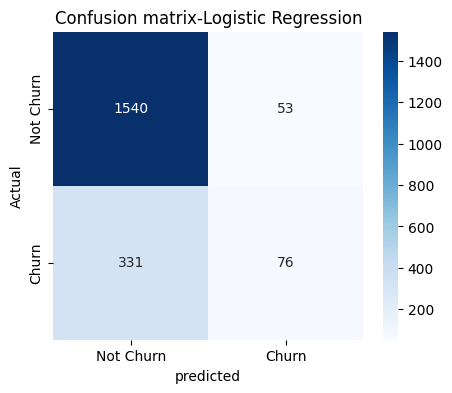

===== Random Forest =====
Accuracy: 0.8645
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000





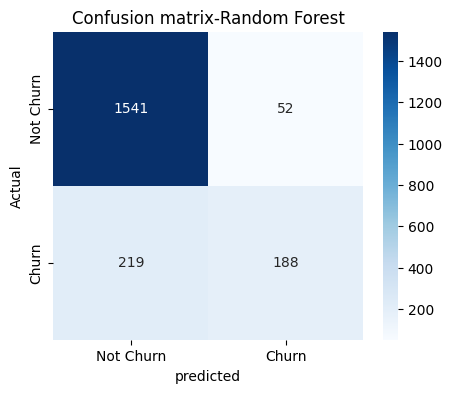

===== Gradient Boosting =====
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000





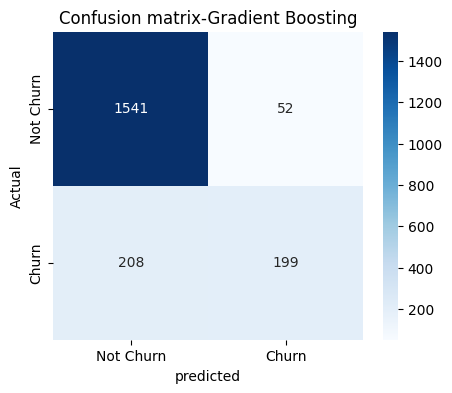

In [20]:
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f"===== {name} =====")
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print("\n")
  cm=confusion_matrix(y_test,y_pred)
  plt.figure(figsize=(5,4))
  sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=["Not Churn","Churn"],yticklabels=["Not Churn","Churn"])
  plt.title(f"Confusion matrix-{name}")
  plt.xlabel("predicted")
  plt.ylabel("Actual")
  plt.show()